In [2]:
import sys
import pygame as pg
from play import main
from config import *
from IPython import get_ipython
from neuralnet import NN

pygame 2.4.0 (SDL 2.26.4, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
nn = NN()
model = nn.model

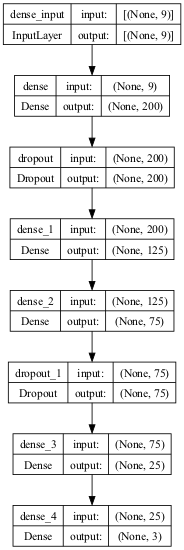

In [4]:
nn.plot_model()

In [5]:
# gather data against random AI, minmax AI
games1 = [main(sim=True, model=0) for _ in range(5000)]
print('done with random AI')
games2 = [main(sim=True, model=1) for _ in range(5000)]
print('done with minmax AI')
games = games1 + games2

done with random AI
done with minmax AI


In [6]:
print_epochs = False
verbose = 1 if print_epochs else 0

X_train, X_test, y_train, y_test = nn.gamesToWinLossData(games)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100, verbose=verbose)

In [11]:
games2 = [main(sim=True,model=model) for _ in range(1000)]

In [12]:
gamesminimax = [main(sim=True,model='minmax') for _ in range(1000)]

In [7]:
gamesmix = [main(sim=True,model=model) for _ in range(1000)]

In [7]:
nn.gameStats(games2)

Results for player 2:
Wins: 62 (62.0%)
Loss: 10 (10.0%)
Draw: 28 (28.0%)


In [13]:
nn.gameStats(gamesminimax)

Results for player 2:
Wins: 807 (80.7%)
Loss: 0 (0.0%)
Draw: 193 (19.3%)


In [8]:
nn.gameStats(gamesmix)

Results for player 2:
Wins: 792 (79.2%)
Loss: 29 (2.9%)
Draw: 179 (17.9%)


In [9]:
model.save('NNwins79')

INFO:tensorflow:Assets written to: NNwins79/assets


INFO:tensorflow:Assets written to: NNwins79/assets


: 